In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
import numpy as np
X = iris['data'][:, 3] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [4]:
from sklearn.linear_model import LogisticRegression
X = X.reshape(-1, 1)
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

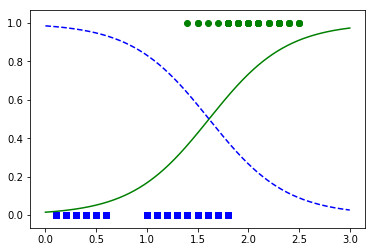

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures=False
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris-Virginica')

tidx = (y == 1)
plt.scatter(X[tidx], y[tidx], color='g', marker='o')
plt.scatter(X[~tidx], y[~tidx], color='b', marker='s')

In [5]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

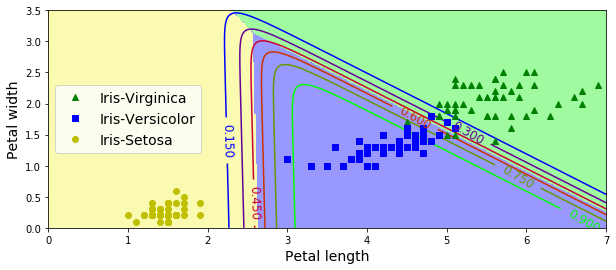

In [31]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures=False

X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1,1),
    np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [29]:
print contour